## 파인튜닝

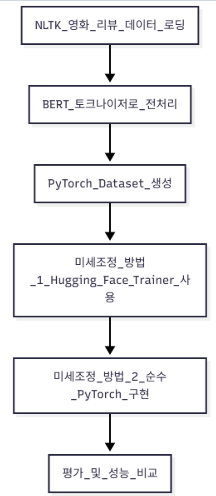

## 파인튜닝 (미세조정) 전/후 비교

In [8]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

test_reviews = [
    "This movie is absolutely amazing! Best film I've ever seen.",
    "Terrible waste of time. Worst movie ever made.",
    "It was okay, nothing special but not bad either.",
    "Brilliant acting and stunning visuals throughout!",
    "Boring and predictable plot. Very disappointed."
]

labels = ["부정", "긍정"]


################# 파인튜닝 전 모델 (랜덤 초기화)
BERT_MODEL_NAME = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL_NAME)
model_before = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME)
model_before.eval()  # 평가모드
with torch.no_grad():
    for i, review in enumerate(test_reviews):
        inputs = tokenizer(review, return_tensors='pt')
        outputs = model_before(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1)[0]
        pred_label = torch.argmax(probs).item()

        print(f'리뷰 : {i+1} : {review}')
        print(f'예측 : {labels[pred_label]} {probs[pred_label]}')
        print(f'긍정 : {probs[1]} | 부정 : {probs[0]}')
        print(f'========================')

c:\Users\playdata2\miniconda3\envs\LLM\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\playdata2\miniconda3\envs\LLM\Lib\site-packages\huggingface_hub\file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


리뷰 : 1 : This movie is absolutely amazing! Best film I've ever seen.
예측 : 긍정 0.603224515914917
긍정 : 0.603224515914917 | 부정 : 0.39677542448043823
리뷰 : 2 : Terrible waste of time. Worst movie ever made.
예측 : 긍정 0.5973017811775208
긍정 : 0.5973017811775208 | 부정 : 0.40269821882247925
리뷰 : 3 : It was okay, nothing special but not bad either.
예측 : 긍정 0.6186404228210449
긍정 : 0.6186404228210449 | 부정 : 0.3813595771789551
리뷰 : 4 : Brilliant acting and stunning visuals throughout!
예측 : 긍정 0.5604919195175171
긍정 : 0.5604919195175171 | 부정 : 0.4395080506801605
리뷰 : 5 : Boring and predictable plot. Very disappointed.
예측 : 긍정 0.6083744168281555
긍정 : 0.6083744168281555 | 부정 : 0.39162561297416687


In [9]:
# %conda install transformers

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
################# 상기 내용 파인튜닝 적용!!!!!!!!!!!!!!

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

train_texts = [
    ("This is wonderful and fantastic!", 1),  # 긍정
    ("Absolutely terrible and awful!", 0),     # 부정
    ("I love this so much!", 1),
    ("Hated it completely!", 0)
]


BERT_MODEL_NAME = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL_NAME)
model_after = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


from transformers import AdamW
optimizer = AdamW(model_after.parameters(), lr=2e-5)
model_after.train()
for epoch in range(5):
    total_loss = 0
    for text, label in train_texts :
        optimizer.zero_grad()
        inputs = tokenizer(text, return_tensors='pt')
        labels = torch.tensor([label])
        outputs = model_after(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss/len(train_texts)
    print(f' epoch : {epoch+1}, loss:{avg_loss:.4f}')



### 미세 조정 후
print('================ 미세 조정 후')

test_reviews = [
    "This movie is absolutely amazing! Best film I've ever seen.",
    "Terrible waste of time. Worst movie ever made.",
    "It was okay, nothing special but not bad either.",
    "Brilliant acting and stunning visuals throughout!",
    "Boring and predictable plot. Very disappointed."
]

labels = ["부정", "긍정"]


with torch.no_grad():
    for i, review in enumerate(test_reviews):
        inputs = tokenizer(review, return_tensors='pt')
        outputs = model_after(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1)[0]
        pred_label = torch.argmax(probs).item()

        print(f'리뷰 : {i+1} : {review}')
        print(f'예측 : {labels[pred_label]} {probs[pred_label]}')
        print(f'긍정 : {probs[1]} | 부정 : {probs[0]}')
        print(f'========================')

c:\Users\playdata2\miniconda3\envs\LLM\Lib\site-packages\huggingface_hub\file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\playdata2\miniconda3\envs\LLM\Lib\site-packages\transformers\optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


 epoch : 1, loss:0.8732
 epoch : 2, loss:0.5395
 epoch : 3, loss:0.3764
 epoch : 4, loss:0.3093
 epoch : 5, loss:0.2363
================ 미세 조정 후
리뷰 : 1 : This movie is absolutely amazing! Best film I've ever seen.
예측 : 긍정 0.8054159283638
긍정 : 0.8054159283638 | 부정 : 0.19458407163619995
리뷰 : 2 : Terrible waste of time. Worst movie ever made.
예측 : 긍정 0.5621347427368164
긍정 : 0.5621347427368164 | 부정 : 0.4378652572631836
리뷰 : 3 : It was okay, nothing special but not bad either.
예측 : 부정 0.5810903310775757
긍정 : 0.4189097583293915 | 부정 : 0.5810903310775757
리뷰 : 4 : Brilliant acting and stunning visuals throughout!
예측 : 긍정 0.6405911445617676
긍정 : 0.6405911445617676 | 부정 : 0.3594088852405548
리뷰 : 5 : Boring and predictable plot. Very disappointed.
예측 : 긍정 0.5782139897346497
긍정 : 0.5782139897346497 | 부정 : 0.42178598046302795


## [ colab!!! ] nltk 영화리뷰 데이터로 BERT 감성분석 모델 완성 ==> colab!!!

- 데이터 로드 및 분할
- BERT 토큰화
- pytorch Dataset 구성
- 모델 학습
- 평가

In [ ]:
# %conda install nltk
# %conda install datasets

In [16]:
import warnings
warnings.filterwarnings('ignore')

import nltk
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import datasets


In [17]:
#### 1 데이터 로드 및 분할
# 라벨은 neg: 0, pos:1
movie_reviews = nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
ids = movie_reviews.fileids()
reviews = [ movie_reviews.raw(id) for id in ids]
categories = [ movie_reviews.categories(id)[0] for id in ids]
labels = [1 if label == 'pos' else 0 for  label in categories]
# 리뷰, 라벨 잘 나눠졌는지 확인
len(reviews), len(labels)
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(
    reviews, labels, stratify=labels, test_size=0.2, random_state=42)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\playdata2\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [18]:
#### 2 토크나이저
BERT_MODEL_NAME = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME)

# 훈련/테스트 데이터 토큰화
train_encodings = tokenizer(x_train, truncation=True, padding=True, return_tensors='pt', max_length=512)
test_encodings = tokenizer(x_test, truncation=True, padding=True, return_tensors='pt', max_length=512)

train_encodings['input_ids'].shape, test_encodings['input_ids'].shape


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(torch.Size([1600, 512]), torch.Size([400, 512]))

In [19]:
# torch dataset 구성
class MovieReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
train_dataset = MovieReviewDataset(train_encodings, y_train)
test_dataset = MovieReviewDataset(test_encodings, y_test)
print(f'훈련 샘플수 {len(train_dataset)}')
print(f'테스트 샘플수 {len(test_dataset)}')



훈련 샘플수 1600
테스트 샘플수 400


In [20]:
next(iter(train_dataset)).keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])

In [21]:
# 모델 로드
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)
print(f' 파라미터 갯수 : {sum(p.numel() for p in model.parameters())}')
print(f' 학습 가능한 파라미터 갯수 : {sum (p.numel() for p in model.parameters() if p.requires_grad)}')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 파라미터 갯수 : 109483778
 학습 가능한 파라미터 갯수 : 109483778


In [24]:
# 평가 
import evaluate
accuracy = evaluate.load('accuracy')
def compute_metrics (eval_pred):
     logits, labels = eval_pred
     predictions = np.argmax(eval_pred)
     return accuracy.compute(predictions=predictions, references=labels)

In [25]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.19.1
Keras version: 3.11.2


In [26]:
from transformers import TrainingArguments, Trainer

In [31]:
# 학습
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy='epoch',
    load_best_model_at_end=True,
    report_to = 'none'  # W&B TensorBoard 자동 로딩 모두 끔
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)
print(f'에포크 : {training_args.num_train_epochs}')
print(f'배치크기 : {training_args.per_device_train_batch_size}')
print(f'학습률 : {training_args.learning_rate}')


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
# 모델 학습
train_result = trainer.train()
print(f'총 학습시간 : {train_result.metrics["train_runtime"]}')
print(f'최종손실 : {train_result.metrics["train_loss"]}')